### 3.1 Regresja Liniowa - Implementacja i wyniki

<!-- -->

<div style="text-align: justify;">
Do reprezentacji danych elipsometrycznych wykorzystano dwie klasy: training_sample oraz training_dataset. Klasa training_sample opisuje pojedynczy zestaw danych dotyczący jednej próbki — zawiera informacje o wartościach PSI oraz DELTA dla długości fal od 300 do 1000 nm, z krokiem co 10 nm. Z kolei klasa training_dataset reprezentuje zbiór próbek, które mogą zostać wykorzystane do uczenia modeli. Obie klasy zakładają, że dane opisujące próbkę — tj. jej grubość oraz współczynniki A, B i C — zawarte są w nazwie pliku, z którego odczytywane są dane, zgodnie ze wzorcem opisanym w poprzednim akapicie. Do poprawnego działania poszczególnych funkcji, konieczne jest także zastosowanie odpowiedniej struktury katalogów, w których znajdują się pliki. Kod wykorzystany do przygotowania tej pracy znaleźć można w repozytorium GitHub pod linkiem https://github.com/MikZmu/machineLearningEllipsometry. Ze względu na brak natywnego wsparcia Jupyter Notebook dla importowania innych notatników do bieżącego notatnika, wykorzystano bibliotekę importnb, która umożliwia importowanie innych notebooków jako modułów Pythona. Aby z niej skorzystać, należy wcześniej zainstalować ją za pomocą polecenia pip install importnb. Do analizy zbioru danych utworzono instancję klasy training_dataset. Konstruktor tej klasy został przedstawiony poniżej.</div>

<!-- -->

In [1]:
def __init__(self, dataset_folder, col):
        self.samples = self.gather_samples(dataset_folder, col)

<!-- -->

<div style="text-align: justify;">
Funkcja ta przyjmuje dwa argumenty: datasets_folder — ścieżkę do folderu zawierającego zbiór danych przeznaczony do analizy — oraz col — listę kolumn, które będą obecne w pojedynczej próbce należącej do zbioru danych. Konstruktor klasy training_dataset wywołuje metodę gather_samples, należącą do tej samej klasy. Metoda ta z kolei wywołuje konstruktor klasy training_sample dla każdego pliku tekstowego znajdującego się w folderze wskazanym przez parametr datasets_folder. Podczas tworzenia obiektu typu training_sample, dane zawarte w odpowiadającym mu pliku są wczytywane i zapisywane jako obiekt typu DataFrame. Wartości grubości próbki (T) oraz parametry A, B i C są odczytywane z nazwy pliku, konwertowane na typ float i przypisywane odpowiednim atrybutom obiektu. Opisane funkcje zostały przedstawione poniżej.</div>

<!-- -->

In [6]:
#funkcja gather_samples z klasy training_dataset
def gather_samples(self, dataset_folder, col):
    all_items = os.listdir(dataset_folder)
    files = [
    item
    for item in all_items
    if os.path.isfile(os.path.join(dataset_folder, item))
    ]
    samples = []
    for i in files:
        sample = training_sample(os.path.join(dataset_folder, i),col)
        samples.append(sample)

    return samples
#konstruktor klasy training_sample
def __init__(self, file_path, col = ['wavelength', 'psi65', 'del65',
                                     'psi70', 'del70', 'psi75', 'del75']):
    # Initialize the training_sample object by decoding the file 
    # name to extract parameters and loading the data from the file.
    self.T = self.decode_sample(file_path)[0]
    self.A = self.decode_sample(file_path)[1]
    self.B = self.decode_sample(file_path)[2]
    self.C = self.decode_sample(file_path)[3]
    self.data = self.load_data(file_path, self.T, self.A, self.B, self.C, col)


# funkcja decode_sample z klasy training_sample odpowiada za odczytywanie
# wartości T, A, B, C z nazwy pliku
def decode_sample(self, filename):
    filename = os.path.basename(filename)
    info = filename.split("_")
    T = info[0]
    A = info[1]
    B = info[2]
    C = info[3]
    C = C.removesuffix(".txt")
    return [T, A, B, C]

# funkcja load_data z klasy training_sample odpowiada za zapisywanie
# danych odczytanych z treści pliku w formie dataframe

def load_data(self, filename, T, A, B, C, col):
    dataHelper = pd.read_csv(filename, sep='\t', header=None, index_col=False)
    dataHelper = dataHelper.drop(index=[0])
    dataHelper = dataHelper.iloc[:, :-1]
    dataHelper.columns = col
    dataHelper['T'] = T
    dataHelper['A'] = A
    dataHelper['B'] = B
    dataHelper['C'] = C
    return dataHelper


<div style="text-align: justify;">
Przed rozpoczęciem pracy konieczne jest zaimportowanie odpowiednich bibliotek i klas. Biblioteka import_ipynb jest wykorzystywana do importowania innych notatników jako modułów Pythona, co pozwala na korzystanie z funkcji i klas zdefiniowanych w tych notatnikach. Klasa training_dataset zawiera kod opisujący zbiór danych, na którym pracowano. Klasa locations pozwala na łatwy dostęp do ścieżek do plików istotnych dla projektu. Biblioteka os pozwala na wykonywanie operacji na ścieżkach do plików.
</div>

In [16]:
import import_ipynb
import training_dataset as td
import locations as l
import os

<div style="text-align: justify;">
Za pomocą funkcji list_datasets pozyskać można ścieżkę do odpowiedniego zbioru danych w celu utworzenia instancji training_dataset.
</div>

In [17]:
l.locations.list_datasets()

['.ipynb_checkpoints',
 'half_new_Si_jaw_delta',
 'lifesat',
 'new_Si_jaw_delta',
 'quarter_new_Si_jaw_delta',
 'R2_comparison_2.ipynb',
 'si02',
 'Si_jaw',
 'Si_jaw_delta']

In [18]:
datasets_folder = l.locations.get_data_dir()
specific_dataset_location = os.path.join(datasets_folder, "new_Si_jaw_delta")
t_dataset = td.training_dataset(specific_dataset_location,
                                col = ['wavelength', 'psi65', 'del65',
                                       'psi70', 'del70', 'psi75', 'del75'])

<div style="text-align: justify;">
Funkcja plot_data zawarta w klasie training_dataset pozwala zwizualizować dane zawarte w zbiorze danych. Funkcja ta przyjmuje jako argumenty nazwy parametrów których rozkład chcemy zbadać. Następnie pobiera one istotne dane z każdej instancji training_sample i prezentuje je w postaci histogramu
</div>

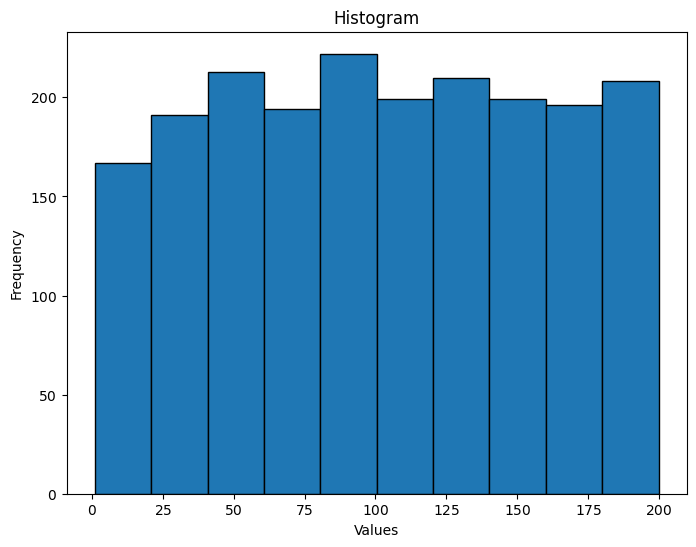

In [19]:
t_dataset.plot_histogram(["T"])

<div style="text-align: center; font-style: italic;">Rysunek 8 - Rozkład wartości grubości T w zbiorze danych</div>

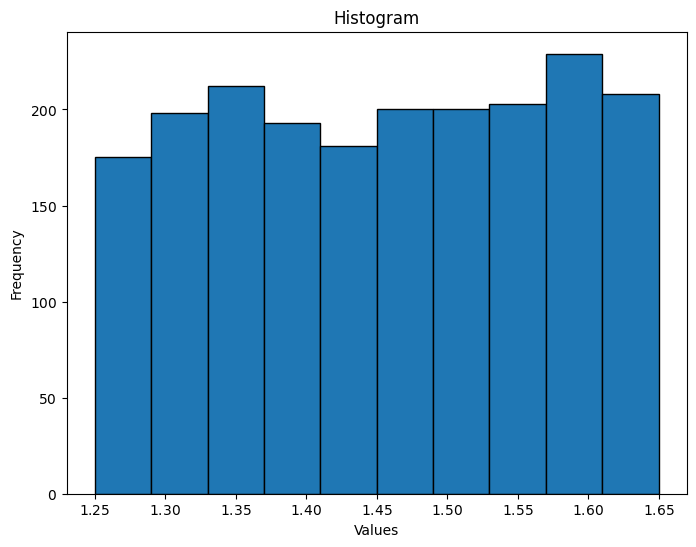

In [20]:
t_dataset.plot_histogram(["A"])

<div style="text-align: center; font-style: italic;">Rysunek 9 - Rozkład wartości grubości A w zbiorze danych</div>

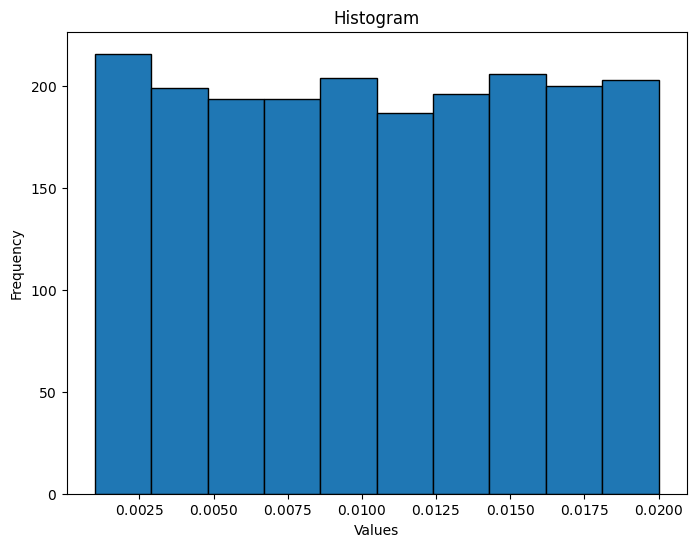

In [12]:
t_dataset.plot_histogram(["B"])

<div style="text-align: center; font-style: italic;">Rysunek 10 - Rozkład wartości grubości B w zbiorze danych</div>

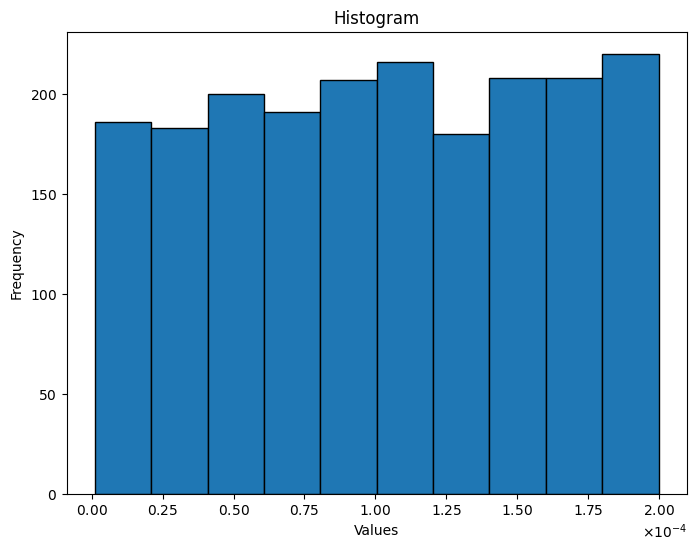

In [13]:
t_dataset.plot_histogram(["C"])

<div style="text-align: center; font-style: italic;">Rysunek 11 - Rozkład wartości grubości C w zbiorze danych</div>

<div style="text-align: justify;">
Otrzymane histogramy wskazują na równomierne rozłożenie danych, co sprawia, że nie jest konieczne zastosowanie algorytmów służących do usuwania odstających wartości. Po zbadaniu rozkładu danych przystąpiono ich analizy za pomocą regresji liniowej. Analizy dokonano na dwa sposoby - pierwszy sposób polega na analizie poszczególnych wierszy zbioru danych - tj. podstawową jednostką, która posłuży do wykonywania inferencji jest pojedynczy wiersz należący do próbki. Wiersz ten składa się z długości fali oraz wartości PSI i DELTA dla trzech różnych kątów padania wiązki. Drugi sposób polega na jednoczesnej analizie całej próbki - tj. podstawową jednostką jest pojedyncza próbka, która składa się z długości fali oraz wartości PSI i DELTA dla trzech kątów padania. Dane przedstawione w ten sposób w dalszej części pracy nazywane będą danymi bądź próbkami spłaszczonymi. W celu przedstawienia próbki w ten sposób użyto funkcji return_as_flat_df należącej do klasy training_sample oraz funkcji o zbliżonej konstrukcji, które zwracają dane innego typu np. zwracają je w formie tensorów bądź listy zmiennych typu float. Funkcję return_as_flat_df przedstawiono poniżej:</div>

In [2]:
def return_as_flat_df(self, feature_columns = ['wavelength', 'psi65',
                                               'del65', 'psi70',
                                               'del70', 'psi75', 'del75']
                      , target_columns = ['T', 'A', 'B', 'C']):
        features = self.data[feature_columns]
        targets = self.data[target_columns]
        targets = targets.iloc[:1]
        features = features.values.reshape(1, -1)
        targets = targets.values.reshape(1, -1)
        features = pd.DataFrame(features)
        targets = pd.DataFrame(targets)
        return features, targets

<div style="text-align: justify;">
Przyjmuje ona jako argumenty listę kolumn, z których wartości będą używane podczas uczenia jako etykiety oraz listę kolumn, z których wartości będą używane jako cechy. Funkcja ta zwraca dwie ramki danych - pierwsza zawiera cechy, druga etykiety. Wartości w ramkach danych są spłaszczone, co oznacza, że każda próbka jest reprezentowana jako pojedynczy wiersz. W obu przypadkach przewidywane będą grubość warstwy SiO<sub>2</sub> oraz współczynniki A, B, C. Regresję liniową przeprowadzono za pomocą biblioteki scikit-learn, która jest jedną z najpopularniejszych bibliotek do uczenia maszynowego w Pythonie [17]. Po utworzeniu instancji klasy, można ją przeprowadzić za pomocą funkcji, lin_reg, flat_lin_reg, lasso_reg, flat_lasso_reg, ridge_reg, flat_ridge_reg. Regresje grzbietowa [ang. "ridge"] i lasso przyjmują jako parametr także wartość alpha. Wartość ta wpływa na funkcję kosztu poprzez penalizację wysokich wartości współczynników regresji, co pozwala na uniknięcie przeuczenia modelu. Wzory na funkcje kosztu regresji lasso oraz grzbietowej przedstawiono poniżej:
</div>

$$
\text{Funkcja kosztu regresji lasso: } \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$$

<div style="text-align: center; font-style: italic;">Równanie 3.2</div>

$$
\text{Funkcja kosztu regresji grzbietowej: } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2
$$

<div style="text-align: center; font-style: italic;">Równanie 3.3</div>


<div style="text-align: justify;">
Funkcję przeprowadzającą regresję typu lasso dla próbek przedstawionych jako pojedyncze wiersze przedstawiono poniżej:
</div>

In [4]:
    def flat_lasso_reg(self, feature_columns=['wavelength', 'psi65',
                                              'del65', 'psi70', 'del70',
                                              'psi75', 'del75'],
                       target_columns=['T'], test_size=0.2,
                       random_state = 42, alpha = 0.1):
        # Split the dataset into training and testing sets
        data = self.flat_df_split(feature_columns, target_columns,
                                  test_size, random_state)
        
        # Initialize Lasso regression model
        lasso_reg = Lasso(alpha=alpha)
        
        # Fit the Lasso regression model on the training data
        lasso_reg.fit(data[0], data[2])
        
        # Predict on train and test sets
        pred_train = lasso_reg.predict(data[0])
        pred_test = lasso_reg.predict(data[1])
        
        # Calculate R² coefficients
        r2_train = r2_score(data[2], pred_train)
        r2_test = r2_score(data[3], pred_test)
        
        # Print R² coefficients
        print(f"Train R²: {r2_train}")
        print(f"Test R²: {r2_test}")
        
        # Return R² coefficients as a dictionary
        return {"train_r2": r2_train, "test_r2": r2_test,
                "coefficients": lasso_reg.coeff_}

<div style="text-align: justify; line-height: 1.5;">
Funkcja ta przyjmuje jako argument listę kolumn, z których wartości będą wykorzystywane podczas uczenia jako cechy, listę kolumn, których wartości będą użyte jako etykiety, rozmiar zbioru testowego, wartość random_state oraz wartość alpha. Funkcja ta dzieli zbiór danych na zbiór treningowy i testowy, następnie tworzy model regresji lasso, uczy go na zbiorze treningowym i dokonuje predykcji na zbiorach treningowym i testowym. Na końcu funkcja ta zwraca współczynnik determinacji R² dla zbioru treningowego i testowego oraz współczynniki regresji. Poniżej zamieszczono tabele zawierające wyniki różnych rodzajów regresji dla wybranych wartości alpha oraz dla różnych wartości poszukiwanych. Wartości uzyskane dzięki zwykłej regresji opisano jako OLS - ordinary least square - jako że jest to metoda obliczania funkcji kosztu wykorzystywana przez tą funkcję. Wyniki uzyskane dla regresji przeprowadzonej na próbkach spłaszczonych zostały opatrzone dopiskiem "flat".
</div>

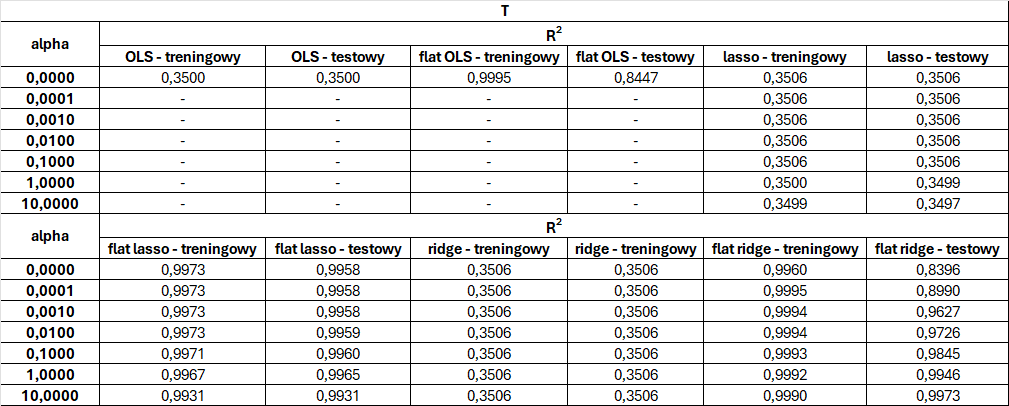

<div style="text-align: center; font-style: italic;">Rysunek 12 - Wyniki regresji dla różnych rodzajów regresji oraz wartości alpha w przypadku wyznaczania grubości T</div>

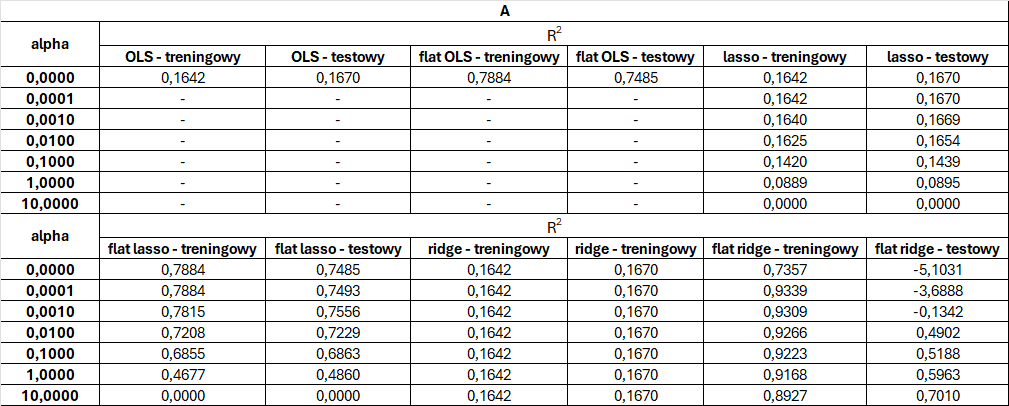

<div style="text-align: center; font-style: italic;">Rysunek 13 - Wyniki regresji dla różnych rodzajów regresji oraz wartości alpha w przypadku wyznaczania współczynnika A</div>

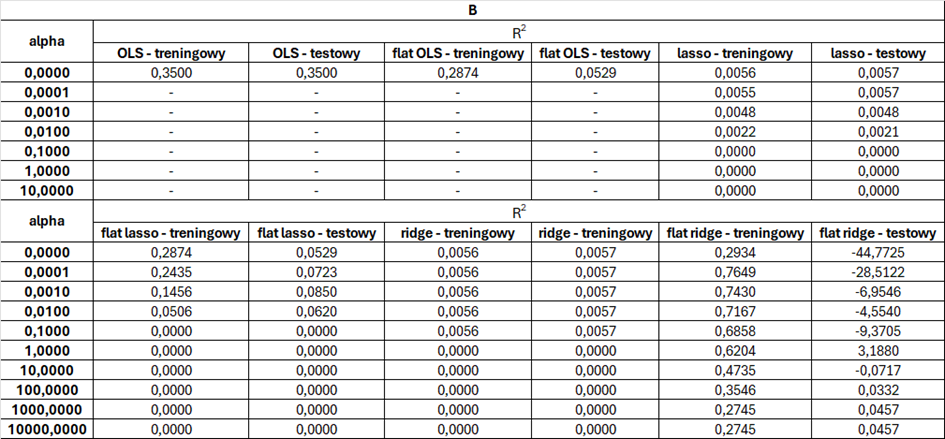

<div style="text-align: center; font-style: italic;">Rysunek 14 - Wyniki regresji dla różnych rodzajów regresji oraz wartości alpha w przypadku wyznaczania współczynnika B</div>

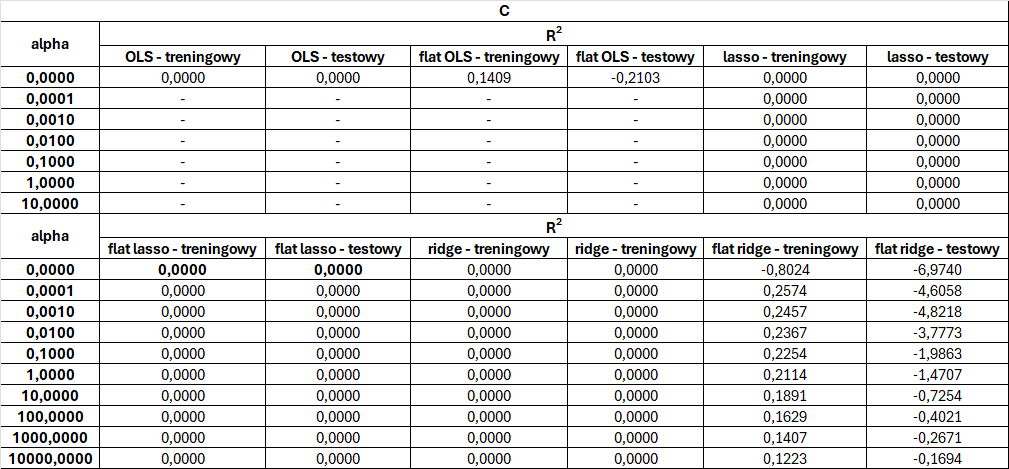

<div style="text-align: center; font-style: italic;">Rysunek 15 - Wyniki regresji dla różnych rodzajów regresji oraz wartości alpha w przypadku wyznaczania współczynnika C</div>

<div style="text-align: justify; line-height: 1.5;">
Ostatecznie wyniki uzyskane za pomocą regresji uznano za niezadowalające. Zadowalające rezultaty uzyskano jedynie podczas przewidywania wartości grubości na podstawie spłaszczonych próbek — współczynnik determinacji dla tej metody wynosił około 0,99 zarówno w przypadku regresji grzbietowej, jak i regresji Lasso. Wyniki uzyskane na podstawie pojedynczych wierszy były niezadowalające we wszystkich przypadkach. Najlepsze rezultaty w tym podejściu uzyskano również dla przewidywania grubości, gdzie współczynnik determinacji osiągał wartość około 0,35. Pewną liniową zależność zauważono także podczas przewidywania współczynnika A, jednak uzyskany współczynnik determinacji wynosił jedynie około 0,15. W przypadku współczynników B i C współczynnik determinacji był bliski zeru. Warto zwrócić uwagę na fakt, że najlepsze wyniki uzyskiwała regresja liniowa grzbietowa przy wysokich wartościach parametru alpha. Może to sugerować, że dokładne przewidywanie współczynników A i B wymaga uwzględnienia szerokiego zakresu cech o niewielkiej, choć niezerowej ważności. Poniżej przedstawiono wykresy rozproszenia dla regresji, które uzyskały najlepsze wyniki dla każdej z przewidywanych wartości (z wyjątkiem współczynnika C). W jego przypadku najlepszy uzyskany współczynnik determinacji dla zbioru testowego miał wartość ujemną, co oznacza, że model został silnie przeuczony, a zależność między wartościami była odwrotna niż oczekiwana.
</div>

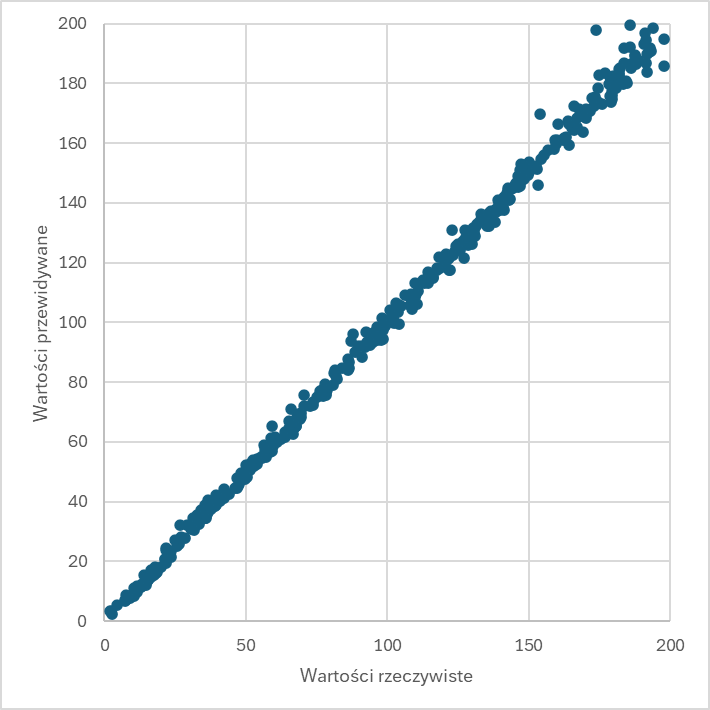

<div style="text-align: center; font-style: italic;">Rysunek 16 - Zależność wartości przewidywanych od wartości rzeczywistych dla grubości T</div>

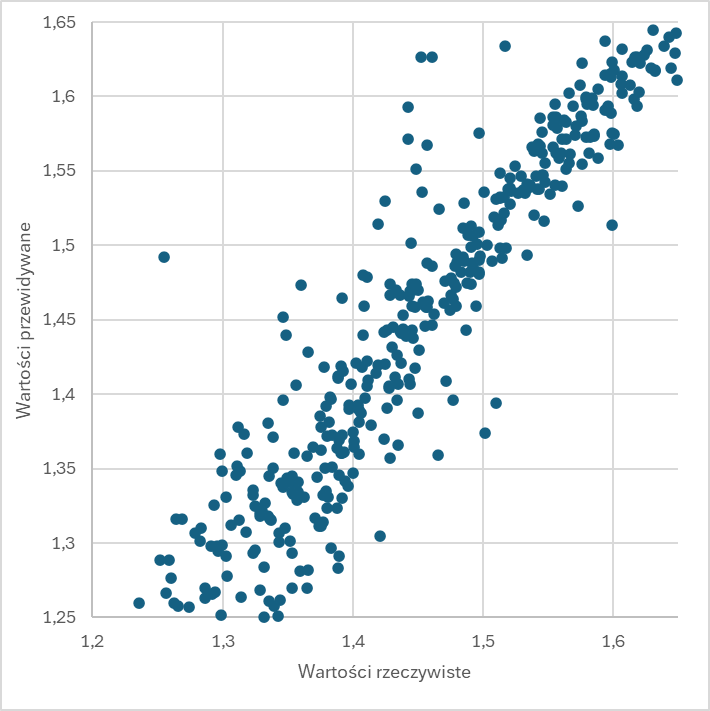

<div style="text-align: center; font-style: italic;">Rysunek 17 - Zależność wartości przewidywanych od wartości rzeczywistych dla współczynnika A</div>

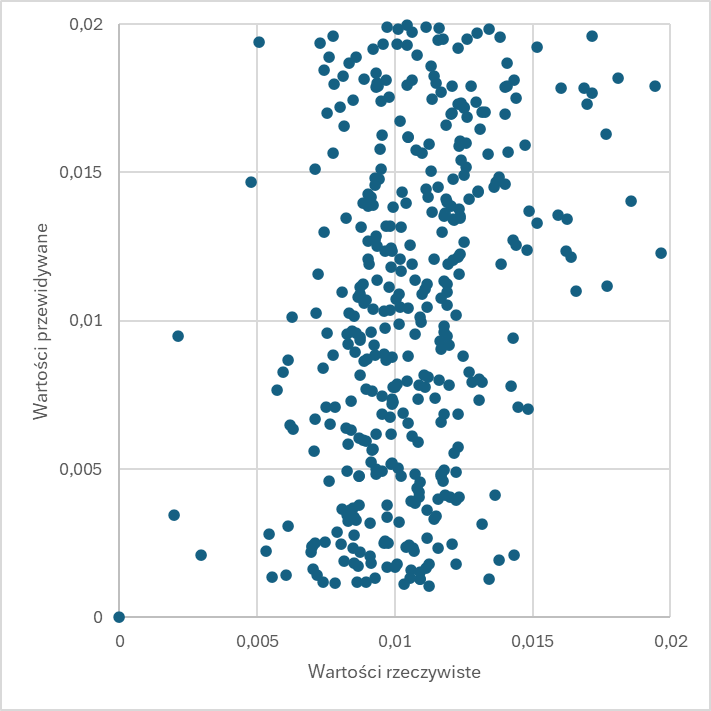

<div style="text-align: center; font-style: italic;">Rysunek 18 - Zależność wartości przewidywanych od wartości rzeczywistych dla współczynnika B</div>

<div style="text-align: justify; line-height: 1.5;">
Wyniki uzyskane za pomocą różnych wariantów regresji liniowej uznano za niezadowalające. Możliwe, że zastosowanie innych odmian regresji, takich jak regresja wielomianowa, pozwoliłoby na uzyskanie lepszych rezultatów. Na potrzeby niniejszej pracy zdecydowano się jednak na zastosowanie sieci neuronowych, które umożliwiają modelowanie bardziej złożonych zależności. W kolejnej sekcji przedstawiono implementację sieci neuronowych oraz wyniki uzyskane przy ich użyciu.
</div>

### 3.2 Sieci Neuronowe - Implementacja i wyniki

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
W niniejszej pracy zdecydowano się na wykorzystanie biblioteki PyTorch jako głównego narzędzia do implementacji i trenowania sieci neuronowych. PyTorch jest otwartoźródłowym frameworkiem rozwijanym przez Facebook AI Research, który zyskał dużą popularność w środowisku naukowym i przemysłowym ze względu na swoją elastyczność oraz intuicyjność [18]. Cechy te umożliwiają łatwe prototypowanie i modyfikowanie modeli, co jest szczególnie istotne w kontekście badań eksperymentalnych, gdzie często konieczne jest testowanie różnych architektur i podejść. Pytorch zapewnia także wsparcie dla akceleracji obliczeń z użyciem GPU za pomocą CUDA. Z racji na to, że karta graficzna używana do trenowania modeli jest kartą RADEON, w celu zyskania możliwości wykorzystania odpowiedniego oprogramowania należało przeprowadzić szkolenie na systemie operacyjnym Linux, gdzie zainstalowano sterowniki AMD ROCm. W celu przeprowadzenia szkolenia na systemie Windows należałoby skorzystać z oprogramowania AMD ROCm for Windows, które jest wciąż w fazie rozwoju i nie jest jeszcze w pełni stabilne [18]. W niniejszej pracy zdecydowano się na wykorzystanie PyTorch w wersji 2.0.1, która jest najnowszą stabilną wersją dostępną w momencie pisania tej pracy. W celu obsługi i zarządzania budową sieci neuronowej oraz przebiegiem procesu trenowania utworzono dwie klasy - klasę MLP opisaną w notatniku model_creator oraz klasę train_model opisaną w notatniku model_training. Z wykorzystaniem tych klas utworzono odpowiednie funkcje zawarte w klasie training_dataset. Pytorch oferuje dużą swobodę w doborze sposobu konstrukcji sieci neuronowej oraz w sposobie przeprowadzania jej szkolenia. Z racji tego, klasy MLP oraz model_training zostaną omówione poniżej.  </div>

### 3.2.1 Klasa MLP - Implementacja sieci neuronowej

<!-- -->

Struktura klasy MLP z wyłączeniem przynależących do niej funkcji statycznych została przedstawiona poniżej:

<!-- -->

In [2]:
import os
import torch
import import_ipynb
import torch.nn as nn
import locations as l

class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers,
                 activation_fn=nn.LeakyReLU):

        super(MLP, self).__init__()
        if len(hidden_layers) > 7:
            raise ValueError("The number of hidden layers cannot exceed 7.")

        self.layers = nn.ModuleList()
        prev_size = input_size

        # Create hidden layers
        for neurons in hidden_layers:
            self.layers.append(nn.Linear(prev_size, neurons))
            self.layers.append(activation_fn())  # Add the specified activation function
            prev_size = neurons

        # Create output layer
        self.layers.append(nn.Linear(prev_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

<!-- -->

<div style="text-align: justify; line-height: 1.5;">  
Klasa ta dziedziczy po "nn.Module", co jest standardową praktyką w PyTorch przy definiowaniu modeli sieci neuronowych. Konstruktor klasy przyjmuje następujące argumenty:
</div>

- input_size: liczba cech wejściowych, które będą podawane do sieci neuronowej. W przypadku analizy opartej na poszczególnych wierszach pochodzących z próbek, będzie ona przyjmować wartość 7. Cechami wtedy będą długość fali oraz wartości PSI i DELTA dla trzech kątów padania wiązki. W przypadku analizy opartej na próbkach spłaszczonych, będzie ona przyjmować wartość 497, ponieważ każda próbka będzie zawierać 7 cech dla każdej z trzech kątów padania wiązki dla 71 długości fali (7 * 71 = 497).

- output_size: liczba wartości, które chcemy przewidzieć. W przypadku przewidywania poszczególnych etykiet, będzie to liczba 1, ponieważ przewidujemy tylko jedną wartość - grubość, bądź jeden z parametrów A,B,C. Istnieje też możliwośc przewidywania większej ilości parametrów jednocześnie - wtedy output_size będzie przyjmowac wartość równą liczbie przewidywanych parametrów.

- hidden_layers: lista liczb całkowitych określających liczbę neuronów w każdej warstwie ukrytej. Maksymalna liczba warstw ukrytych wynosi 7, co jest ograniczeniem narzuconym przez konstruktor klasy. Każda warstwa może zawierać w sobie dowolną liczbę neuronów.

-  activation_fn: funkcja aktywacji, która będzie stosowana w warstwach ukrytych. Domyślnie jest to LeakyReLU, ale można użyć dowolnej innej funkcji aktywacji dostępnej w PyTorch, np. ReLU, Sigmoid, Tanh itp. LeakyReLU jest funkcją aktywacji, która jest podobna do ReLU, ale pozwala na przepływ niewielkiej ilości sygnału dla wartości ujemnych, co może pomóc w uniknięciu problemu "zanikającego gradientu".

<div style="text-align: justify; line-height: 1.5;">
    
Funkcja forward jest odpowiedzialna za propagację w przód sieci neuronowej. Przechodzi przez wszystkie warstwy zdefiniowane w konstruktorze i zwraca wynik końcowy. Klasa ta pozwala na łatwe tworzenie sieci neuronowych o różnych architekturach poprzez modyfikację liczby warstw ukrytych oraz liczby neuronów w każdej z nich. Dzięki zastosowaniu "nn.ModuleList" możliwe jest dynamiczne dodawanie warstw do modelu, co czyni tę klasę elastyczną i łatwą w użyciu.
    
</div>


<!-- -->

### 3.2.2 Klasa model_training oraz implementacja procesu trenowania modelu

<!-- -->

Z racji na obszerność klasy model_training w pracy zostanie umieszczona wyłącznie jej część umożliwiająca szkolenie bez użycia partii.

<!-- -->

In [5]:
def train_model(model, loss_fn, optimizer, x_train, 
                y_train, x_test, y_test, model_name, batch_size=0):
    
    os.environ['TERM'] = 'xterm'
    best_loss = float('inf')


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    
    model = model.to(device)

    model_folder = l.locations.get_models_dir()
    save_path = os.path.join(model_folder, model_name)
    
    x_train, y_train = x_train.to(device), y_train.to(device)
    x_test, y_test = x_test.to(device), y_test.to(device)

    def r2_loss(y_pred, y_true):
        ss_total = torch.sum((y_true - torch.mean(y_true)) ** 2)
        ss_residual = torch.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return 1 - r2  # Loss is 1 - R²

        while True:
            IPython.display.clear_output(wait=True)
            # Forward pass
            model.train()
            outputs = model(x_train)
            loss = loss_fn(outputs, y_train)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            model.eval()
            with torch.no_grad():
                test_pred = model(x_test)
                test_loss = loss_fn(test_pred, y_test)
                r2_test_loss = r2_loss(test_pred, y_test)

            if loss.detach().item() < best_loss:
                best_loss = loss.item()
                torch.save(model.state_dict(), save_path)
                print(f"New best loss: {best_loss:.4f}. Model saved to {save_path}.")

            print(f"Current Loss: {loss.item():.8f}, Test Loss:
            {test_loss.item():.8f}")
            print(f"Current R2 Loss: {r2_loss(outputs, y_train).
            item():.8f}, Test R2 Loss: {r2_test_loss:.8f}")

<!-- -->

Klasa ta przyjmuje następujące argumenty:

-  model: instancja klasy MLP, która będzie trenowana. Model ten powinien być zdefiniowany wcześniej i zawierać odpowiednią architekturę sieci neuronowej.

-  loss_fn: funkcja straty, która będzie używana do oceny jakości modelu. Może to być np. Mean Squared Error (MSE) lub inna funkcja straty odpowiednia dla problemu regresji.

-  optimizer: optymalizator, który będzie używany do aktualizacji wag modelu. Może to być np. Adam, SGD lub inny optymalizator dostępny w PyTorch.

-   x_train, y_train: dane treningowe, które będą używane do trenowania modelu. x_train to tensor zawierający cechy wejściowe, a y_train to tensor zawierający etykiety (wartości docelowe).

-   x_test, y_test: dane testowe, które będą używane do oceny modelu po każdej epoce treningu. x_test to tensor zawierający cechy wejściowe dla danych testowych, a y_test to tensor zawierający etykiety (wartości docelowe) dla danych testowych.

-   model_name: nazwa modelu, która będzie używana do zapisania wytrenowanego modelu.

-   batch_size: rozmiar partii, który będzie używany podczas trenowania modelu. Jeśli batch_size jest równy 0, model będzie trenowany na całych danych treningowych bez podziału na partie. Jeśli batch_size jest większy od 0, dane treningowe zostaną podzielone na partie o określonym rozmiarze.

<div style="text-align: justify;">
Klasa ta umożliwia szkolenie modelu zarówno za pomocą procesora (ang. CPU), jak i akceleratora graficznego (ang. GPU). W przypadku dostępności GPU, model zostanie przeniesiony na urządzenie GPU, co przyspieszy proces trenowania. Funkcja ta zapisuje najlepszy model na podstawie wartości funkcji straty, co pozwala na zachowanie najlepszego modelu uzyskanego podczas treningu. Funkcja ta jest elastyczna i może być dostosowana do różnych architektur sieci neuronowych oraz różnych problemów regresyjnych. Daje ona również możliwość monitorowania procesu trenowania poprzez wyświetlanie aktualnej wartości funkcji straty oraz współczynnika determinacji R². Proces trenowania jest realizowany w pętli, która kontynuuje się do momentu przerwania przez użytkownika. W każdej iteracji pętli model jest trenowany na danych treningowych, a następnie oceniany na danych testowych. Jeśli wartość funkcji straty dla modelu na danych treningowych jest mniejsza niż dotychczasowa najlepsza wartość, model jest zapisywany na dysku. Na ieżąco wyświetlane są wartości funkcji straty oraz współczynnika determinacji R² dla danych treningowych i testowych, pozwala na oszacowanie właściwego momentu przerwania procesu trenowania. Predykcje dokonywane w celu oszacowania błędu na zbiorze testowym są dokonywane przy użyciu torch.no_grad, co oznacza że nie są one uwzględniane w obliczeniach gradientu, co przyspiesza proces trenowania i zmniejsza zużycie pamięci. Sprawia to również, że model nie uczy się na zbiorze testowym, co jest zgodne z zasadami uczenia maszynowego. Funkcje odpowiedzialne za trenowanie modelu na danym zestawie danych zostały umieszczone w klasie training_dataset. Funkcje te - funkcja train, flat_train oraz ich wariacje - przyjmują jako argumenty listę kolumn z których wartości będziemy chcieli użyć podczas uczenia jako cechy oraz listę kolumn z których wartości będziemy chcieli użyć jako etykiety. Przyjmują one także jako argumenty funkcję używaną do obliczenia strat oraz tabelę opisukącą liczbę neuronów znajdujących się w poszczególnych warstwach. Z racji na fakt że podczas przeprowadzania badań użyto wielu architektur sieci neuronowych, przyjęto konwencję co do nazewnictwa modeli. W celu sprawnego generowania nazw modeli które zawierają informacje o architekturze sieci neuronowej, oraz o danych użytych podczas szkolenia utworzono funkcję generate_model_name. Funkcja te została przedstawiona poniżej:
</div>






<!-- -->

In [ ]:
    def generate_model_name(self,feature_columns, target_columns, is_standardized, hidden_layers, prefix="model"):
        # Join feature and target column names
        features_part = "_".join(feature_columns)
        targets_part = "_".join(target_columns)
        
        # Add standardization information
        standardization_part = "standardized" if is_standardized
        else "non_standardized"
        
        # Add hidden layer information
        hidden_layers_part = "_".join(map(str, hidden_layers))
        
        # Combine all parts into the model name
        model_name = f"{prefix}_{features_part}_to_{targets_part}_{standardization_part}_layers_{hidden_layers_part}.pth"
        return model_name

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
Funkcja ta jest wywoływana wewnątrz metod odpowiedzialnych za trenowanie modeli, zawartych w klasie training_dataset. Przyjmuje ona jako argumenty listę kolumn, z których wartości będziemy chcieli użyć podczas uczenia jako cechy, listę kolumn, z których wartości będziemy chcieli użyć jako etykiety, informację o tym czy dane zostały znormalizowane, oraz listę liczb całkowitych określających liczbę neuronów w każdej warstwie ukrytej. Funkcja ta zwraca nazwę modelu, zawierającą informacje na temat architektury sieci neuronowej oraz danych użytych podczas szkolenia.</div>

<div style="text-align: justify; line-height: 1.5;">
Nazwa modelu jest tworzona w formacie "model_{features}_to_{targets}_{standardization}_layers_{hidden_layers}.pth", gdzie {features} to nazwy cech wejściowych, {targets} to nazwy etykiet, {standardization} to informacja o tym czy dane zostały znormalizowane, a {hidden_layers} to liczba neuronów w poszczególnych warstwach ukrytych. Funkcja ta pozwala na łatwe generowanie nazw modeli, które są czytelne i zawierają istotne informacje na temat modelu. Na przykład nazwa modelu "model_wavelength_psi65_del65_psi70_del70_psi75_del75_ to_A_non_standardized_layers_64_32_16" oznacza model, który przewiduje wartość A na podstawie cech wejściowych takich jak długość fali oraz wartości PSI i DELTA dla trzech kątów padania wiązki. Dane użyte przy szkoleniu tego modelu nie były standaryzowane. Model taki składa się z trzech warstw ukrytych, z których pierwsza zawiera 64 neurony, druga 32 neurony, a trzecia 16 neuronów. Modele które były trenowane z użyciem spłaszczonych próbek zawierają w nazwie modelu dodatkowy przedrostek "flat", co pozwala na łatwe odróżnienie ich od modeli trenowanych na pojedynczych wierszach. Przykładowa nazwa takiego modelu to "flat_model_wavelength_psi65_del65_psi70_del70_psi75_del75_to_A_non_standardized_layers_64_32_16.pth". W celu oceny jakości modeli trenowanych z użyciem pojedynczych wierszy utworzono funkcje takie jak get_median_r2_score i get_mean_r2_score. Obliczają one medianę i średnią współczynnika determinacji R² dla przewidywań dokonywanych na wszystkich wierszach zawartych w danej próbce. Następnie obliczają one wartości R² dla wszystkich próbek zawartych w zbiorze danych. W celu oceny jakości modeli trenowanych z użyciem spłaszczonych próbek utworzono funkcje takie jak flat_test_r2. Funkcja ta dokonuje przewidywań na wszystkich próbkach zawartych w zbiorze danych, a następnie oblicza na ich podstawie współczynniki determinacji R².

### 3.2.3 Sieci neuronowe - rezultaty

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
Jak wspomniano w powyższym podpunkcie, sieci trenowano zarówno z wykorzystaniem poszczególnych wierszy jak i spłaszczonych próbek. W obu przypadkach zastosowano architektury sieci neuronowych o różnych rozmiarach, jednak w przypadku szkolenia opartego na poszczególnych wierszach wyniki były dużo gorsze. W celu uzyskania miarodajnego porównania jakości poszczególnych sieci w tej pracy zdecydowano się na umieszczenie wyników tylko ich poszczególnych wersji. Pierwsze podjęte próby dotyczyło możliwości przewidywania wartości poszukiwanych parametrów na podstawie pojedynczych wierszy. W tym celu wyszkolono modele o architekturach 7x64x32x16x1, 7x32x16x8x1 oraz 7x16x8x4x1. Zarówno wartości cech jak i wartości etykiet nie poddawano skalowaniu. Wszystkie modele trenowano przez okres jednej godziny, w celu uzyskania miarodajnego porównania. Jako funkcji strat użyto błędu średniokwadratowego, a zastosowanym optymizatorem był Adam. Podczas wielokrotnego powtarzania procesu uczenia zauważono, że uczenie przynosi lepsze rezultaty w przypadkach, gdy zastosowana prędkość uczenia jest niska. W celu miarodajnego porównania dla wszystkich wyuczonych modeli zastosowano prędkość uczenia równą 0,00001. Tabelę zawierającą współczynniki korelacji uzyskane dla zbiorów treningowych, testowych oraz dla zbiorów połączonych zamieszczono w tabeli poniżej:</div>

<!-- -->

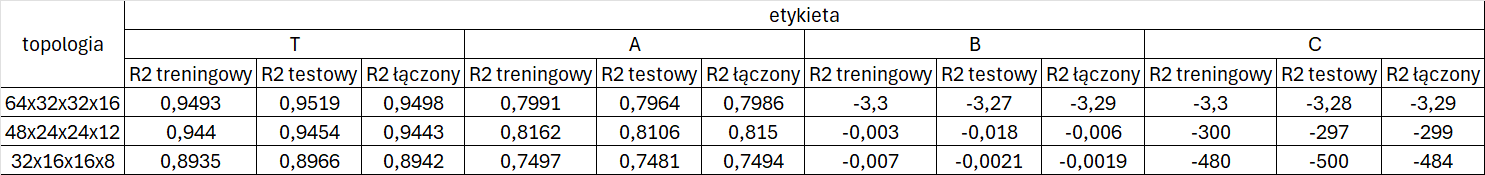

<div style="text-align: center; font-style: italic;">Rysunek 19 - Wyniki regresji dla różnych architektur sieci neuronowych w przypadku przewidywania wartości T, A, B, C na podstawie pojedynczych wierszy</div>

<!-- -->

<div style="text-align: justify; line-height: 1.5;">
Powyższe wyniki dla trzech różnych topologii sieci (64×32×32×16, 48×24×24×12, 32×16×16×8) wyraźnie pokazują, że modele o takiej samej architekturze bardzo dobrze radzą sobie z predykcją etykiety T, nieco gorzej z etykietą A, natomiast praktycznie nie uczą się etykiet B i C. Dla T współczynnik determinacji R² na zbiorach treningowym i testowym utrzymuje się na poziomie 0,89–0,95. Minimalne różnice między tymi wartościami świadczą o braku przeuczenia i stabilnej zdolności generalizacji modelu. W przypadku etykiety A R² wynosi ok. 0,75–0,82, co wskazuje na umiarkowanie dobrą jakość dopasowania; również tutaj niewielka różnica między wynikami dla zbioru treningowego i testowego sugeruje, że model nie ulega znacznemu przeuczeniu. Dla etykiet B i C wszystkie topologie osiągają znacznie ujemne wartości R² (od ok. –3 w największej sieci do nawet –480 w najmniejszej), zarówno na zbiorze treningowym, jak i testowym. Oznacza to, że zachowanie modelu jest gorsze niż w przypadku przewidywania stałej wartości (średniej), co wskazuje na całkowity brak dopasowania. Brak zauważalnej poprawy między topologiami sugeruje, że mamy do czynienia z niedouczeniem – sieć nie potrafi uchwycić żadnych zależności pomiędzy cechami a tymi etykietami. Można więc wnioskować, że przewidywanie etykiet T i A jest możliwe na podstawie dostępnych danych, podczas gdy dla B i C może być konieczne zastosowanie innych metod (np. modeli sekwencyjnych lub wykorzystanie dodatkowych cech), bądź też dane te nie zawierają wystarczających informacji umożliwiających skuteczne modelowanie. Jako jedną z możliwych przyczyn takich wyników rozważano fakt, że parametry B i C przyjmują bardzo małe wartości. Może to prowadzić do tzw. problemu zanikającego gradientu, który często występuje w sieciach neuronowych, zwłaszcza gdy etykiety mają niewielką skalę. W celu weryfikacji tej hipotezy przeprowadzono eksperyment polegający na skalowaniu wartości etykiet za pomocą klasy StandardScaler z biblioteki scikit-learn. Skalowanie to przekształca wartości w taki sposób, aby miały średnią równą 0 oraz odchylenie standardowe równe 1. Skalowaniu poddano zarówno etykiety, jak i cechy. Użyte w tym celu obiekty scaler zapisano w folderze scalers, znajdującym się w katalogu code_data_models. Skalowanie przeprowadzono wyłącznie w celach diagnostycznych. W przyszłości, jeśli zajdzie potrzeba przeprowadzenia podobnej procedury, zalecane byłoby użycie przekształceń, które nie zmieniają semantyki etykiet, a jedynie ułatwiają ich interpretację przez model. Kolejną rozważaną przyczyną słabych wyników była niewystarczająca liczba próbek w zbiorze danych. Aby jednocześnie przetestować wpływ skalowania i rozmiaru danych, powtórzono proces trenowania modeli dla zbiorów przeskalowanych danych o wielkości 500, 1000 i 2000 próbek. Wyniki tych eksperymentów przedstawiono poniżej.
</div>

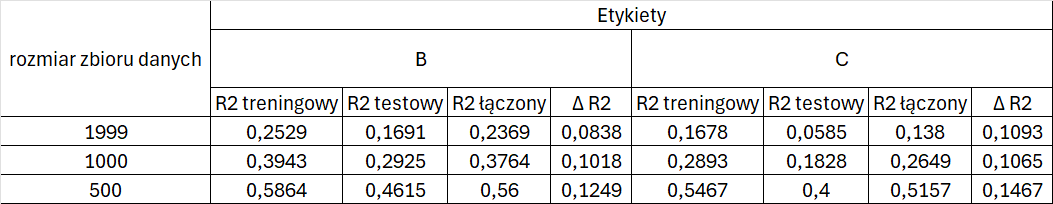

<div style="text-align: center; font-style: italic;">Rysunek 20 - Wyniki regresji dla różnych rozmiarów zbioru danych oraz różnych architektur sieci neuronowych w przypadku przewidywania wartości B oraz C na podstawie pojedynczych wierszy</div>

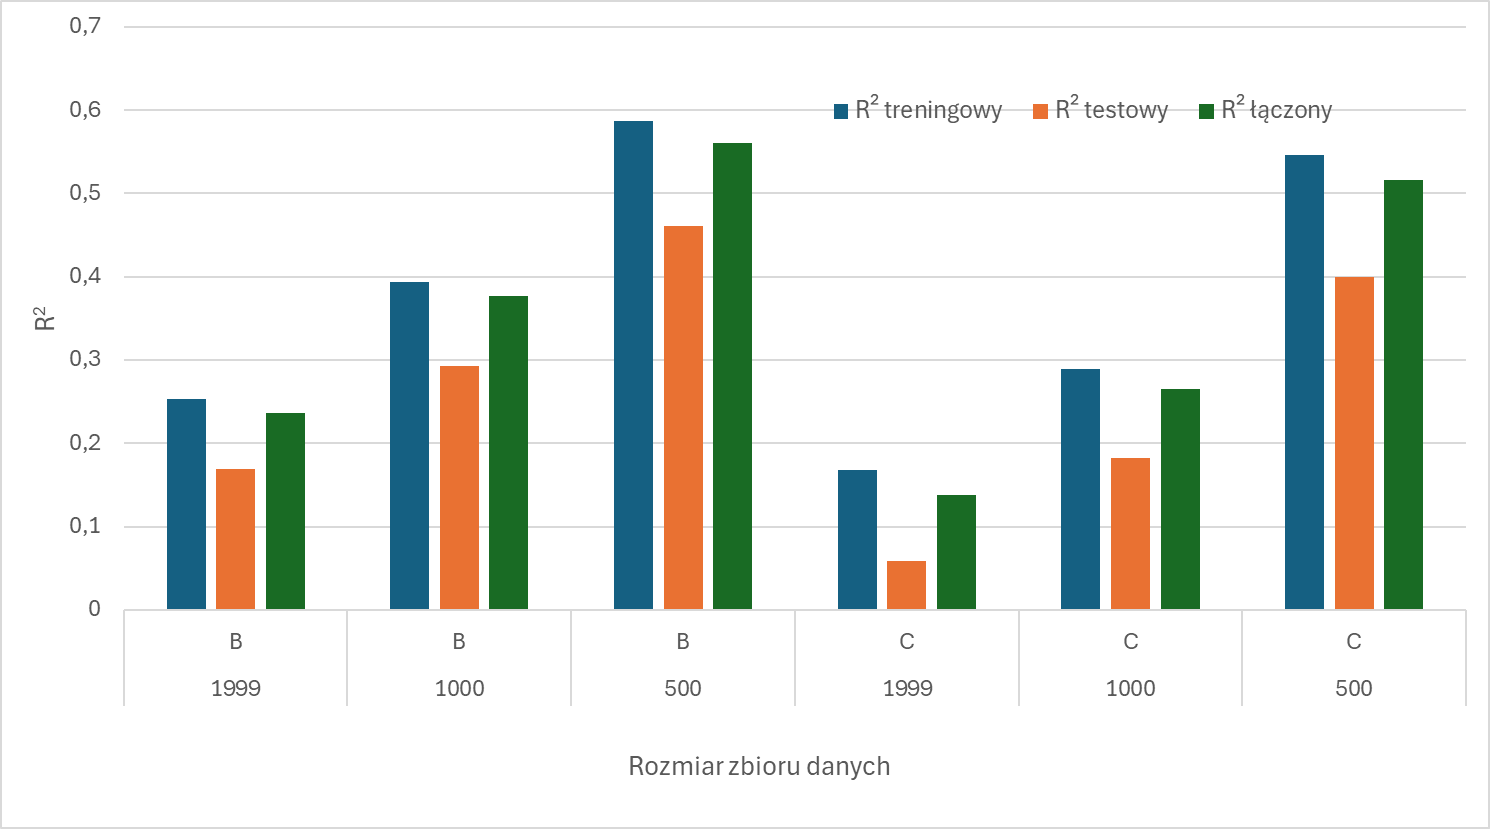

<div style="text-align: center; font-style: italic;">Rysunek 21 - Wyniki regresji dla różnych rozmiarów zbioru danych oraz różnych architektur sieci neuronowych w przypadku przewidywania wartości B oraz C na podstawie pojedynczych wierszy</div>

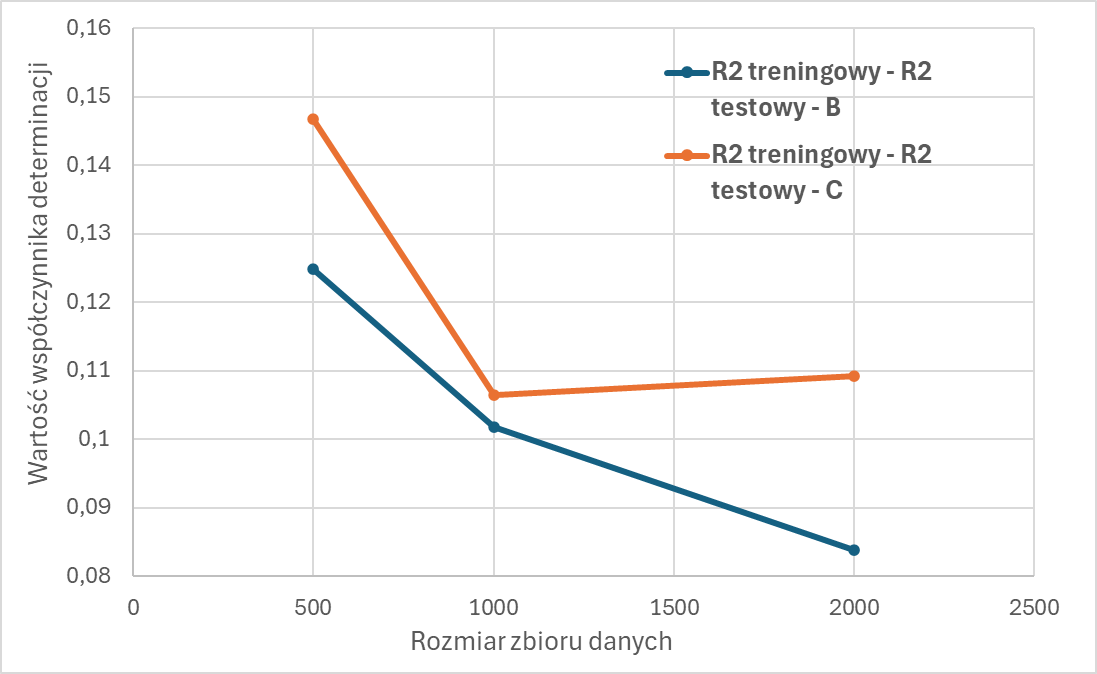

<div style="text-align: center; font-style: italic;">Rysunek 22 - Zależność przeuczenia modelu od rozmiaru zbioru danych dla etykiet B i C.</div>

<div style="text-align: justify; line-height: 1.5;">
Jak można zaobserwować na podstawie załączonych rysunków, dla obu etykiet, wraz ze zmniejszaniem rozmiaru zbioru, obserwujemy wyraźny wzrost wartości współczynnika determinacji zarówno na zbiorze treningowym, jak i testowym – najniższe R² (odpowiednio ok. 0,25 dla B i 0,17 dla C) występuje przy największym zbiorze (1999 próbek), a najwyższe (0,59 dla B i 0,55 dla C) przy najmniejszym (500 próbek). Jednocześnie różnice pomiędzy R² dla zbioru treningowego i testowego pozostają stosunkowo niewielkie, co świadczy o stabilnym uogólnianiu modelu bez nadmiernego przeuczenia. Zatem, mimo że bardziej rozbudowany zbiór danych zazwyczaj sprzyja lepszej generalizacji, w omawianym przypadku mniejsza liczba próbek – po standaryzacji – pozwala modelowi osiągnąć wyższy poziom dopasowania. Może to wynikać z ograniczenia różnorodności szumu oraz łatwiejszego wykrywania wzorców w mniej zróżnicowanym zbiorze. Może to również sugerować konieczność zastosowania większych, bardziej złożonych sieci neuronowych, które byłyby w stanie uchwycić bardziej subtelne zależności pomiędzy cechami a etykietami B i C. Warto również zauważyć, że wartości R² dla etykiet B i C pozostają nadal stosunkowo niskie, co może wskazywać na trudność w przewidywaniu tych parametrów na podstawie dostępnych cech. W celu dalszej analizy i poprawy wyników warto rozważyć zastosowanie innych architektur sieci neuronowych, takich jak sieci konwolucyjne, które mogą lepiej radzić sobie z bardziej złożonymi zależnościami w danych. W dalszej części pracy zdecydowano się na przeprowadzenie analizy z wykorzystaniem spłaszczonych próbek. W tym celu utworzono funkcję flat_train, która przyjmuje jako argumenty listę kolumn, z których wartości mają zostać użyte jako cechy, oraz listę kolumn, z których wartości mają zostać użyte jako etykiety. Modele trenowano w wersjach przewidujących poszczególne etykiety osobno, ze względu na znaczne różnice skali między poszczególnymi parametrami. W przypadku trenowania modelu przewidującego jednocześnie etykiety C i T, model faworyzowałby etykietę T, ponieważ – ze względu na wyższe wartości – miała ona większy wpływ na wartość funkcji kosztu. Proces uczenia przebiegał szybciej niż w wersji z pojedynczymi wierszami, co można tłumaczyć znacznym zmniejszeniem rozmiaru zbioru treningowego – każda próbka była reprezentowana jako pojedynczy wiersz. W celu uzyskania miarodajnych wyników, modele trenowano przez 30 minut. Ze względu na większą liczbę użytych cech, zdecydowano się na nieznaczne zwiększenie rozmiaru modeli. Zastosowano architekturę 497×128×64×32×16×8×1, gdzie 497 to liczba cech wejściowych, a 1 – liczba neuronów w warstwie wyjściowej. Jako funkcji strat użyto błędu średniokwadratowego (MSE), a jako optymalizatora – algorytmu Adam. Podczas wielokrotnego powtarzania procesu uczenia zauważono, że lepsze rezultaty osiągano przy niskim współczynniku uczenia. Dla zapewnienia porównywalności wyników dla wszystkich modeli zastosowano współczynnik uczenia równy 0,00001. Do przetestowania efektów uczenia użyto funkcji flat_test_r2. Poniżej zamieszczono tabelę zawierającą współczynniki determinacji uzyskane dla zbiorów treningowych oraz testowych.
</div>


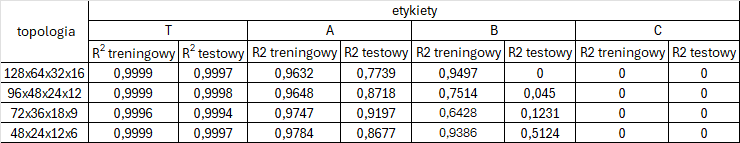

<div style="text-align: center; font-style: italic;">Rysunek 23 - Wyniki regresji dla różnych architektur sieci neuronowych w przypadku przewidywania wartości T, A, B, C na podstawie spłaszczonych próbek.</div>

Poniżej zamieszczono także wykresy rozproszenia dla najlepszych wyników uzyskanych dla wartości T i A.

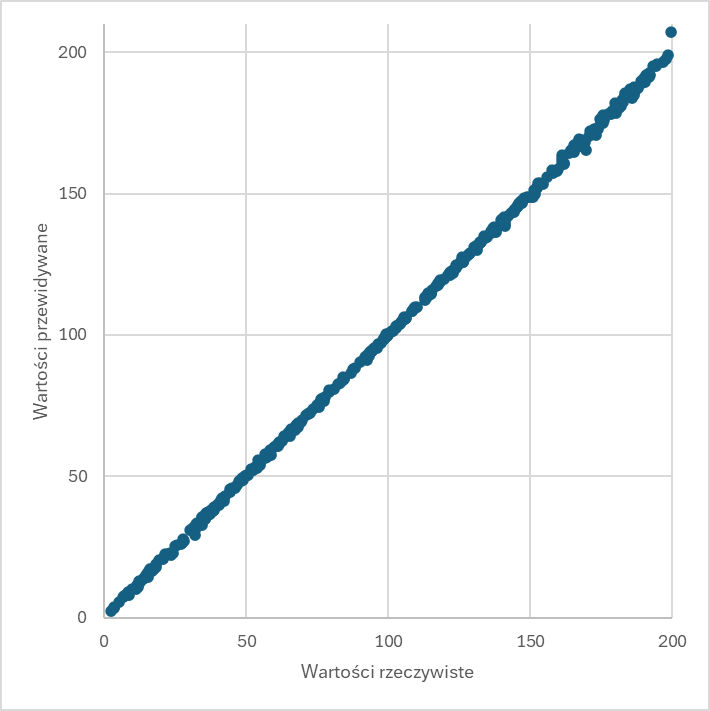

<div style="text-align: center; font-style: italic;">Rysunek 24 - Wykres rozproszenia dla wartości T uzyskanych za pomocą sieci o architekturze 128x64x32x16</div>

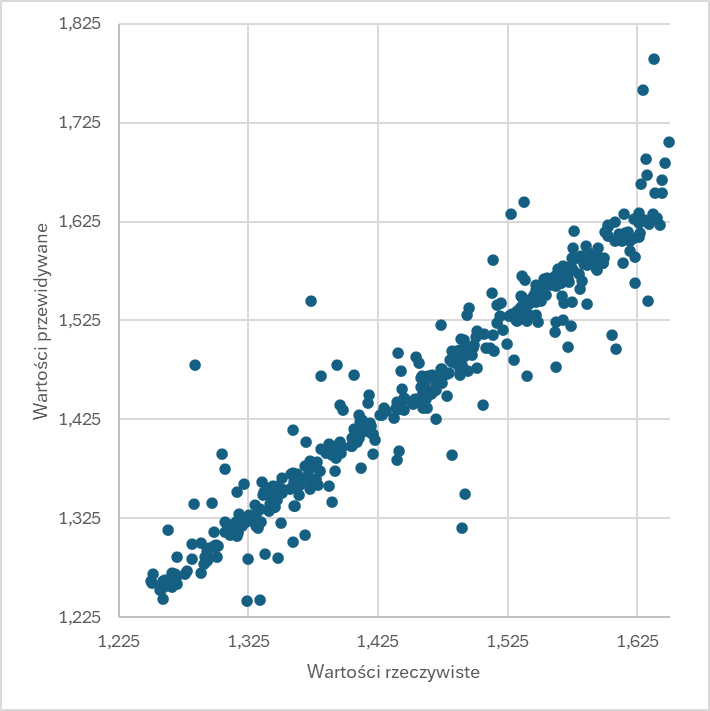

<div style="text-align: center; font-style: italic;">Rysunek 25 - Wykres rozproszenia dla wartości A uzyskanych za pomocą sieci o architekturze 72x36x18x9</div>

<div style="text-align: justify; line-height: 1.5;">
Jak można zauważyć, sieć wydaje uzyskuje dobre i bardzo dobre wyniki podczas przewidywania wartości grubości T oraz współczynnika A. W przypadku przewidywania wartości grubości T, współczynnik determinacji R² dla zbioru treningowego wynosi około 0,99, zarówno dla zbioru testowego jak i treningowego. W przypadku przewidywania wartości współczynnika A, współczynnik determinacji R² dla zbioru treningowego waha się w okolicach 0,9 dla obu zbiorów. Osiągnięcie optymalnych wyników wydaje się być kwestią zastosowania odpowiedniej architektury sieci oraz przerwania uczenia w odpowiednim momencie. Wskazane może być zastosowanie algorytmów wczesnego zatrzymywania, które pozwalają na przerwanie uczenia w momencie, gdy model przestaje się uczyć bądź zaczyna zachodzić przeuczenie. Pozwoliłoby to na uzyskanie optymalnego stosunku wartości R² dla zbioru treningowego do R² dla zbioru testowego. W przypadku przewidywania wartości B, współczynnik determinacji R² dla zbioru treningowego przyjmuje wartości powyżej 0,9, ale dla zbioru testowego wartości te są znacznie niższe. W przypadku przewidywania wartości C, współczynnik determinacji R² zarówno dla zbioru treningowego, jak i testowego jest bliski zeru. Ponownie postanowiono przeskalować wartości B i C, aby sprawdzić czy będzie miało to wpływ na wyniki. W tym celu utworzono funkcje flat_train_1000 oraz flat_train_100000 które przeprowadzają szkolenie z wykorzystaniem etykiet przemnożonych przez 1000 lub 100000. Wartości te zostały dobrane w taki sposób, aby rzędy wartości etykiet B i C były porównywalne z rzędami wartości etykiet T i A. Dla wartości B przeprowadzono szkolenie z użyciem funkcji flat_train_1000, a dla wartości C z użyciem funkcji flat_train_100000. Utworzono także funkcje flat_test_1000 oraz flat_test_100000, które pozwalają na przeprowadzenie testów na zbiorach przeskalowanych. Wykonano także jedną próbę z wykorzystaniem wartości A przemnożonych przez 1000. Wyniki oraz wykresy rozproszenia dla wybranych przypadków zamieszczono poniżej.
</div>


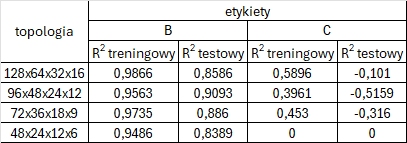

<div style="text-align: center; font-style: italic;">Rysunek 26 - Wyniki regresji dla różnych architektur sieci neuronowych w przypadku przewidywania wartości B i C na podstawie spłaszczonych próbek z przeskalowanymi wartościami</div>

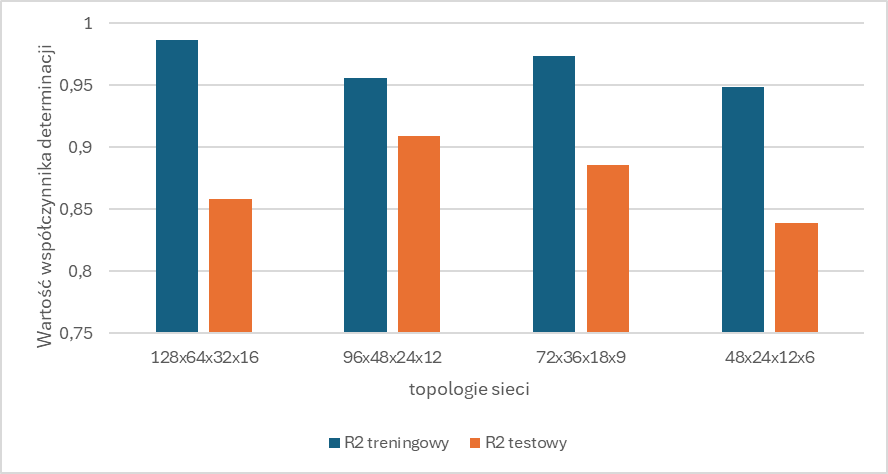

<div style="text-align: center; font-style: italic;">Rysunek 27 - Wyniki regresji dla różnych architektur sieci neuronowych w przypadku przewidywania wartości B i C na podstawie spłaszczonych próbek z przeskalowanymi wartościami</div>


Dla parametru A wyszkolono tylko jedną sieć o topologii 128x64x32x16. Uzyskany wynik był lepszy niż dla wersji bez skalowania. Współczynnik determinacji wynosił 0,9884 dla zbioru treningowego oraz 0,9726 dla zbioru testowego. Poniżej zamieszczono wykresy rozproszenia dla parametrów A, B i C.

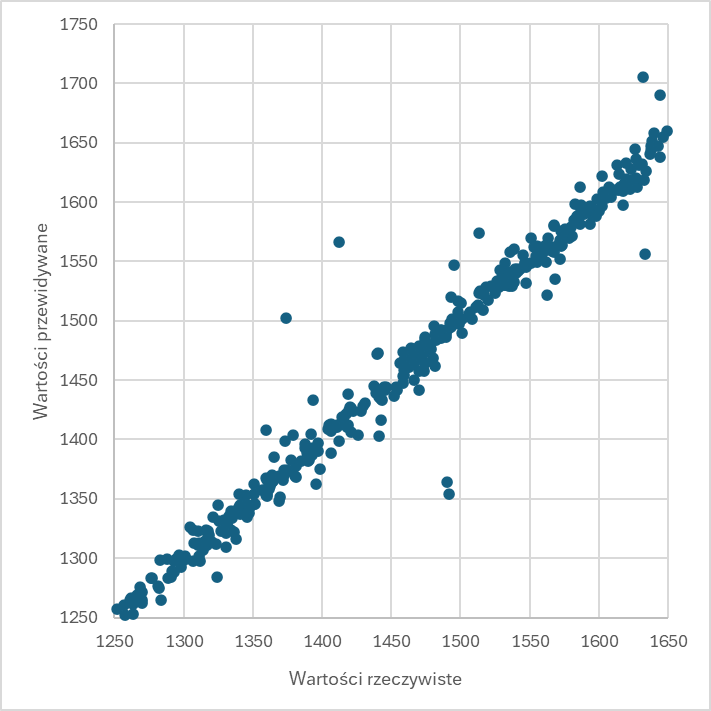

<div style="text-align: center; font-style: italic;">Rysunek 28 - Zależność wartości przewidywanych od wartości rzeczywistych dla współczynnika A uzyskanych za pomocą sieci o architekturze 128x64x32x16 z przeskalowanymi wartościami etykiet. (pomnożonymi razy 1000)</div>

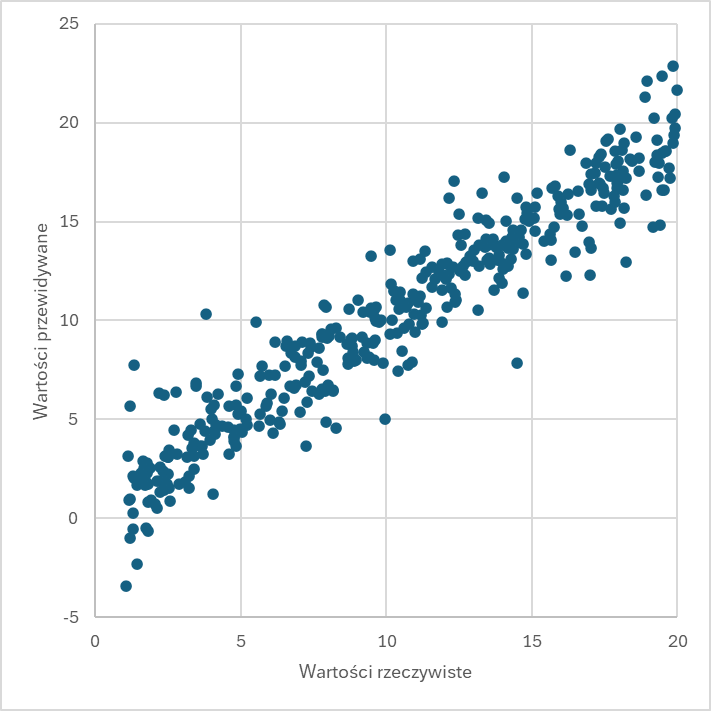

<div style="text-align: center; font-style: italic;">Rysunek 29 - Zależność wartości przewidywanych od wartości rzeczywistych dla współczynnika B uzyskanych za pomocą sieci o architekturze 96x48x24x12 z przeskalowanymi wartościami etykiet. (pomnożonymi razy 1000)</div>

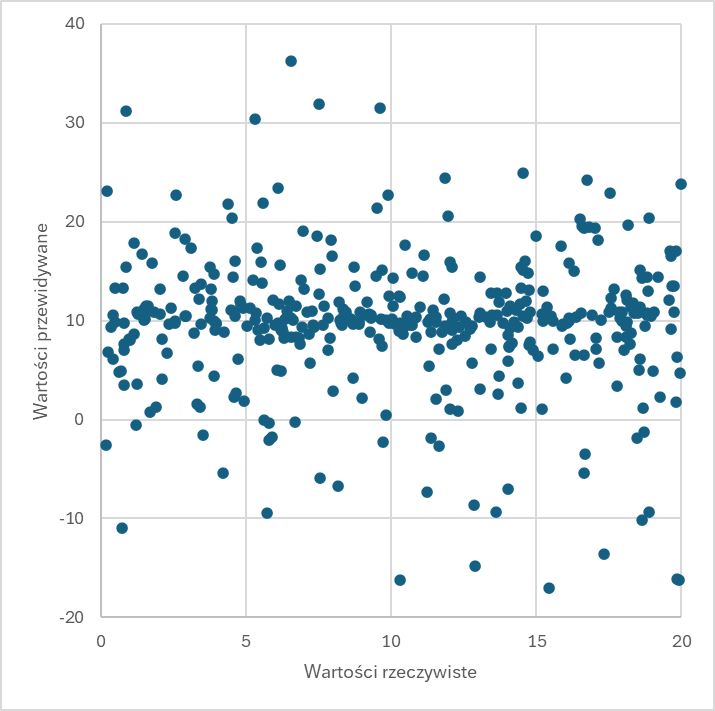

<div style="text-align: center; font-style: italic;">Rysunek 30 - Zależność wartości przewidywanych od wartości rzeczywistych dla współczynnika C uzyskanych za pomocą sieci o architekturze 128x64x32x16 z przeskalowanymi wartościami etykiet. (pomnożonymi razy 100000)</div>

<div style="text-align: justify; line-height: 1.5;">
Analiza wyników przedstawionych w tabeli oraz na wykresach wskazuje, że spośród rozważanych topologii sieci neuronowej najlepsze rezultaty dla etykiety B osiągnięto przy strukturze 96×48×24×12, dla której wartość współczynnika determinacji dla zbioru testowego wyniosła 0,9093, co świadczy o bardzo dobrej zdolności generalizacji modelu. Pozostałe konfiguracje również uzyskały wysokie wartości, jednak widoczny jest spadek dokładności na zbiorze testowym w przypadku topologii 128×64×32×16 oraz 48×24×12×6, co może wskazywać na częściowe przeuczenie modelu. W przypadku etykiety C nie zaobserwowano skutecznego dopasowania modelu dla żadnej z testowanych topologii, co sugeruje konieczność ponownej analizy jakości danych wejściowych, wyboru cech lub przemyślenia struktury modelu dla tej klasy wyjściowej. Problem jest na tyle widoczny że może on wskazywać na problem z samą generacją danych, co może wymagać dalszych badań i ewentualnej modyfikacji procesu generowania danych. W szczególności istotna wydaje się być zależność pomiędzy danymi wprowadzanymi w poszczególne pola w programie WVASE a danymi umieszczanymi w nazwach plików zawierających dane na temat poszczególnych próbek.
</div>